In [68]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crab = pd.read_csv('crab_data.csv') # import csv do ramki danych
crab.head() # wyświetlenie pierwszych pięciu rekordów

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1,M,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,2,I,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,3,M,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,4,M,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


In [69]:
crab.drop(['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight'], axis=1, inplace = True) # usunięcie zbędnych kolumn
crab # wyświetlenie df

,Sex,Age
0,I,5.0
1,M,8.0
2,I,6.0
3,M,10.0
4,M,9.0
...,...,...
49995,I,8.0
49996,F,10.0
49997,M,11.0
49998,I,6.0


In [67]:
if crab.isnull().values.any(): # sprawdzenie, czy nie ma pustego rekordu
    crab = crab.dropna().reset_index(drop=True) # jeśli taki występuje, zostaje usunięty


crab = crab[crab.Sex != 'I'] # działamy na dwóch płciach - male i female, a w pliku CSV widzimy jeszcze I - pozbywamy się go.
crab.reset_index(drop=True, inplace=True) # reset indeksu df, aby przypisać nowy, sekwencyjny indeks
crab # ponowne wyświetlenie df 

,Sex,Age
0,1,8.0
1,1,10.0
2,1,9.0
3,1,9.0
4,1,15.0
...,...,...
33817,1,9.0
33818,1,10.0
33819,2,10.0
33820,1,11.0


In [28]:
crab['Sex'] = crab['Sex'].astype(int) # zmiana typu danych w "Sex" na int (całkowitoliczbową).
crab['Sex'].replace({'M' : 1, 'F': 2}, inplace = True) # zamiana dwóch stringów - M na 1 oraz F na 2 (male & female).

In [30]:
crab.describe() # wyświetlenie statystyk opisowych tj. liczba niepustych wartości, średnia wartość w kolumne, odchylenia czy najmniejsza i największa wartość.

,Sex,Age
count,33822.000000,33822.000000
mean,1.454497,11.067648
std,0.497933,2.995661
min,1.000000,1.000000
25%,1.000000,9.000000
50%,1.000000,10.000000
75%,2.000000,12.000000
max,2.000000,29.000000


In [21]:
crab.info() # wyświtlenie liczby wierszy i kolumn, nazwy kolumn, typy danych kolumn oraz ilość niepustych wartości w poszczególnych kolumnach.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33822 entries, 0 to 33821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     33822 non-null  object 
 1   Age     33822 non-null  float64
dtypes: float64(1), object(1)
memory usage: 528.6+ KB


<AxesSubplot:>

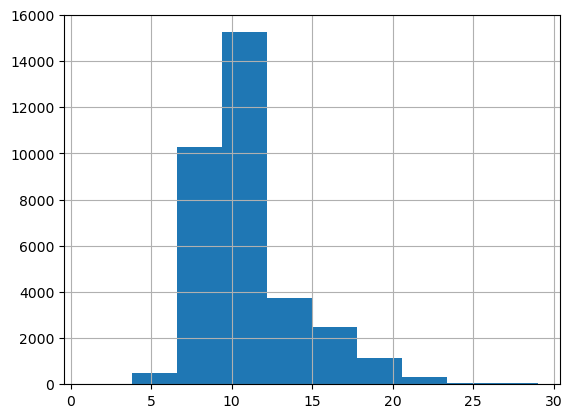

In [22]:
crab['Age'].hist() # wygenerowanie histogramu do przedstawieniaw występowania wieku na wykresie

<AxesSubplot:>

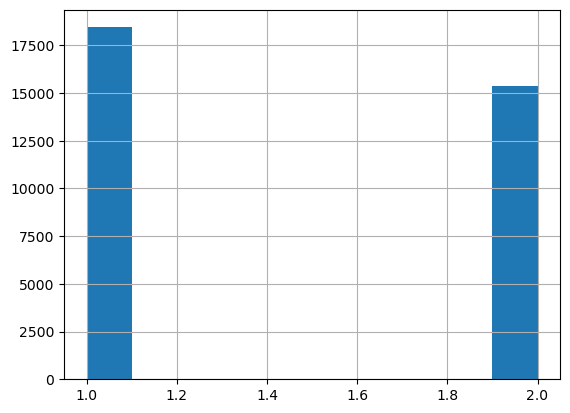

In [29]:
crab['Sex'].hist() # wygenerowanie histogramu do wyświetlenia płci na wykresie

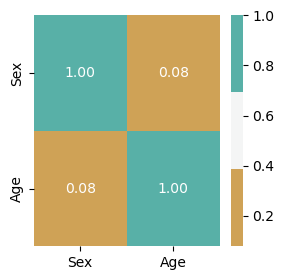

In [31]:
correlations = crab.corr() # stworzenie macierzy korelacji dla wszystkich kolumn w df.
fig, ax = plt.subplots(figsize=(3, 3)) # stworzenie obiektu figury (fig) i osi (ax) o określonym rozmiarze, w tym przypadku 3 na 3.

colormap = sns.color_palette("BrBG", 3) #definicja palety, która będzie użyta w heatmapie

sns.heatmap(correlations, # stworzenie heatmapy na podstawie macierzy korelacji.
    cmap=colormap, # parametr 'cmap' określa użytą paletę kolorów
    annot=True, # annot=True dodaje wartość korelacji jako adnotację
    fmt=".2f") # ustala format wyświetlania, w tym przypadku dwie liczby po przecinku
ax.set_yticklabels(crab.columns) # usunięcie etykiety osi Y na nazwy kolumn z df

plt.show() # wyswietlenie wykresu

In [32]:
X = crab.drop('Sex', axis = 1).to_numpy() # usunięcie kolumny Sex w celu uporzadkowania danych dot. wieku
X # wyświetlenie

array([[ 8.],
       [10.],
       [ 9.],
       ...,
       [10.],
       [11.],
       [12.]])

In [33]:
y = crab.loc[:, 'Sex'].to_numpy() # wybieramy wszystkie wiersze za pomocą metody .loc[] ":". oraz przekształcenie go w tablicę generowaną w NumPy
y

array([1, 1, 1, ..., 2, 1, 1])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) # podzielenie danych na zbiór treningowy i testowy przy użyciu funkcji train_test_split() z biblioteki sklearn.model_selection. 
# x i y to macierz X i wektor y, które zawierają dane pochodzące z df. test_size=0.2 określa, że 20% danych będzie przypisane do zbioru testowego, a 80% danych będzie przypisane do zbioru treningowego.
# random_state=12345 ustawia ziarno losowości, co zapewnia powtarzalność podziału danych. 

In [35]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenowanie modelu, dopasowując go do danych treningowych. Model jest uczony na podstawie macierzy cech 
    classifier.fit(feature_vector_train, label)
    
    # generowanie przewidywania modelu dla danych testowych, korzystając z macierzy cech feature_vector_valid. Przewidywania są przechowywane w zmiennej predictions.
    predictions = classifier.predict(feature_vector_valid)
    
    # obliczenie miary precyzji, czułości i F1-score dla przewidywań predictions w odniesieniu do rzeczywistych etykiet y_test. Funkcja zwraca listę wyników dla każdej klasy.
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0], # 
        scores[1][0], # 
        scores[2][0] # przechwycenie w tablicy wartości precyzji, czułości i F1-score dla klasy o indeksie 0 (domyślnie pierwsza klasa). Wyniki są przechowywane w zmiennej score_vals.
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test)) # obliczenie dokładności (accuracy) modelu, porównując przewidywania predictions z rzeczywistymi etykietami y_test oraz dodanie wartości do listy score_vals.
    return score_vals # zwrócenie listy score_vals

In [36]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test) # stworzenie obiektu klasyfikatora regresji logistycznej oraz wywołanie funkcji train_model z klasyfikatorem regresji logistycznej, danymi treningowymi X_train i y_train, oraz danymi testowymi X_test. Funkcja trenuje model regresji logistycznej, generuje przewidywania dla danych testowych i ocenia wyniki modelu na podstawie danych testowych.
accuracy_compare = {'LR': accuracy} # stworzenie słownika accuracy_compare, w którym kluczem jest 'LR', a wartością jest dokładność (accuracy) modelu regresji logistycznej.
print ("LR: ", accuracy) # wyświetlenie wartości dokładności (accuracy) modelu regresji logistycznej.

LR:  [0.890171858216971, 0.5571428571428572, 0.6853421542278271, 0.5500369549150037]


In [48]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test) # stworzenie obiektu klasyfikatora maszyny wektorów nośnych (SVM) i wywołanie funkcji train_model z klasyfikatorem SVM, danymi treningowymi X_train i y_train, oraz danymi testowymi X_test. Funkcja trenuje model SVM, generuje przewidywania dla danych testowych i ocenia wyniki modelu na podstawie danych testowych.
accuracy_compare['SVM'] = accuracy # dodanie wartości do słownika accuracy_compare klucz 'SVM' i przypisanie wartości dokładności (accuracy) modelu SVM.
print ("SVM" , accuracy) # wyświetlenie wartości dokładności (accuracy) modelu SVM. 

SVM [0.9272287862513426, 0.5555913113435237, 0.694838514941141, 0.5516629711751663]


In [49]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test) # stworzenie obiektu klasyfikatora drzew losowych (Random Forest) oraz wywołanie funkcji train_model z klasyfikatorem drzew losowych, danymi treningowymi X_train i y_train, oraz danymi testowymi X_test. Funkcja trenuje model drzew losowych, generuje przewidywania dla danych testowych i ocenia wyniki modelu na podstawie danych testowych.
accuracy_compare['RF'] = accuracy # dodanie wartości do słownika accuracy_compare klucz 'RF' (Random Forest) i przypisanie wartości dokładności (accuracy) modelu drzew losowych.
print ("RF: ", accuracy)

RF:  [0.7408700322234156, 0.5666461285684946, 0.6421505876876528, 0.5454545454545454]


<AxesSubplot:>

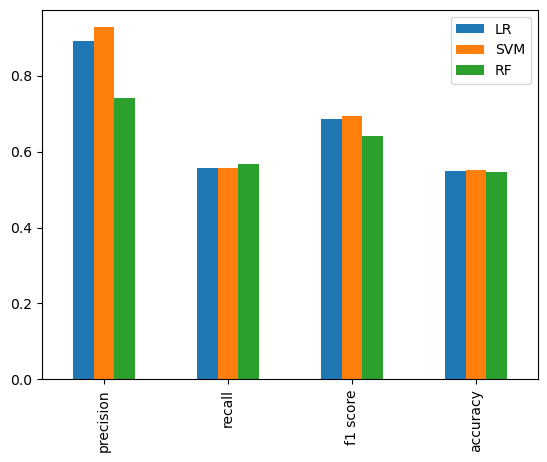

In [50]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy']) # stworzenie obiektu df o nazwie df_compare na podstawie słownika accuracy_compare. Indeksy df są ustawione na ['precision', 'recall', 'f1 score', 'accuracy'], a wartości są pobierane z kluczy i wartości w słowniku 
df_compare.plot(kind='bar') # wyświetlenie wykresu słupkowego dla danych w df. Jeśli chodzi o obiekt df_compare -> każdy model (LR, SVM, RF) jest reprezentowany jako osobny słupek, a wysokości słupków odpowiadają wartościom dokładności, precyzji, czułości i F1-score dla poszczególnych modeli.

In [51]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier # import klasy MLPClassifier z modułu sklearn.neural_network, która reprezentuje sieć neuronową.
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000) # stworzenie obiektu MLPClassifier jako model sieci neuronowej. Parametr hidden_layer_sizes określa architekturę sieci neuronowej, a max_iter określa maksymalną liczbę iteracji podczas treningu.
accuracy = train_model(mlp, X_train, y_train, X_test) # wywołanie funkcji train_model z modelem sieci neuronowej mlp, danymi treningowymi X_train i y_train, oraz danymi testowymi X_test. Funkcja trenuje model sieci neuronowej, generuje przewidywania dla danych testowych i ocenia wyniki modelu na podstawie danych testowych.
accuracy_compare['neural network'] = accuracy # dodanie do słownika accuracy_compare klucza 'neural network' i przypisanie wartości dokładności (accuracy) modelu sieci neuronowej.
print ("neural network" , accuracy) # wyświetlenie wartości dokładności (accuracy) modelu sieci neuronowej.

neural network [0.9229323308270677, 0.5565991902834008, 0.6944135771290029, 0.5528455284552846]


In [52]:
# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test) # stworzenie obiektu klasyfikatora maszyny wektorów nośnych (SVM) z parametrem gamma ustawionym na 'auto'. Parametr gamma kontroluje wpływ pojedynczych przykładów danych na tworzenie granic decyzyjnych przez model oraz wywołanie funkcji train_model z klasyfikatorem SVM z automatycznym gamma, danymi treningowymi X_train i y_train, oraz danymi testowymi X_test. Funkcja trenuje model SVM z automatycznym gamma, generuje przewidywania dla danych testowych i ocenia wyniki modelu na podstawie danych testowych.
accuracy_compare['SVM'] = accuracy # dodanie do słownika accuracy_compare klucza 'SVM' i przypisanie mu wartości dokładności (accuracy) modelu SVM z automatycznym gamma.
print ("SVM gamma='auto'" , accuracy) # wyświetlenie wartości dokładności (accuracy) modelu SVM z automatycznym gamma.

SVM gamma='auto' [0.7408700322234156, 0.5666461285684946, 0.6421505876876528, 0.5454545454545454]


In [53]:
# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test) # stworzenie obiektu klasyfikatora maszyny wektorów nośnych (SVM) z jądrem sigmoidalnym. Jądro sigmoidalne jest jednym z rodzajów jąder używanych w SVM, które transformuje dane na podstawie funkcji sigmoidalnej oraz wykonanie funkcji train_model z klasyfikatorem SVM z jądrem sigmoidalnym, danymi treningowymi X_train i y_train, oraz danymi testowymi X_test. Funkcja trenuje model SVM z jądrem sigmoidalnym, generuje przewidywania dla danych testowych i ocenia wyniki modelu na podstawie danych testowych.
accuracy_compare['SVM'] = accuracy # dodanie do słownika accuracy_compare klucza 'SVM' i przypisanie wartości dokładności (accuracy) modelu SVM z jądrem sigmoidalnym.
print ("SVM kernel='sigmoid'" , accuracy) # wyświetlenie wartości dokładności (accuracy) modelu SVM z jądrem sigmoidalnym.

SVM kernel='sigmoid' [0.9774436090225563, 0.5459727013649317, 0.7006062939081897, 0.5401330376940133]


In [54]:
# MODEL 7 - Support Vector Machine 
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test) # stworzenie obiektu klasyfikatora maszyny wektorów nośnych (SVM) oraz wykonanie funkcji train_model z klasyfikatorem SVM, danymi treningowymi X_train i y_train, oraz danymi testowymi X_test. Funkcja trenuje model SVM, generuje przewidywania dla danych testowych i ocenia wyniki modelu na podstawie danych testowych.
accuracy_compare['SVM'] = accuracy # dodanie do słownika accuracy_compare klucza 'SVM' i przypisanie wartości dokładności (accuracy) modelu SVM.
print ("SVM degree=4" , accuracy) # wyświetlenie wartości dokładności (accuracy) modelu SVM z parametrem degree równym 4. Parametr degree odnosi się do stopnia wielomianowego jądra SVM.

SVM degree=4 [0.9272287862513426, 0.5555913113435237, 0.694838514941141, 0.5516629711751663]


In [63]:
import pickle # import modułu pickle, który umożliwia serializację i deserializację obiektów Pythona.

file_path = 'crab_data.pickle' # ścieżkę pliku, do którego będą zapisywane dane, do zmiennej file_path, w tym przypadku ten sam folder, plik .pickle.

# Zapis danych do nowego pliku w poprawnym kodowaniu UTF-8
with open(file_path, 'wb') as handle: # otwarcie pliku w trybie zapisu binarnego ('wb'). Wykorzystane jest polecenie with, które automatycznie zarządza zamykaniem pliku po zakończeniu bloku kodu.
    pickle.dump(data, handle) # zapisanie obiektu data do pliku o podanej ścieżce (handle) przy użyciu metody dump z modułu pickle. Dane są zapisywane w postaci zserializowanej.